# WeatherPy

## Observable Trends Based on the Data

* There is a strong, negative correlation between a city's latitude and maximum temperature in the northern hemisphere. That is, as you go farther away from the equator (latitude increases), a city's maximum temperature will generally be lower than cities closer to the equator in the northern hemisphere. This is what I expected to see - for example, it's a lot colder in Minnesota (farther north) than it is in Mexico.
* There is a very weak, positive correlation between cloudiness and a city's latitude for both the northern and southern hemispheres. This is represented in the scatter plots in this notebook for those two factors as the data points being scattered across the graph. As a result, we can conclude that a city's latitude has little to no influence on how cloudy a city is.
* There is a very weak, positive correlation for the northern hemisphere between a city's latitude and wind speed (mph), and there is a very weak, negative correlation for the southern hemisphere for those same two factors. I think the fact that the southern hemisphere has a negative correlation and the northern hemisphere has a positive correlation has to have something to do with the northern hemisphere and southern hemisphere being in opposite seasons from each other. Overall, for both hemispheres, latitude has a small influence on wind speed but not very much. However, it is important to note that the correlation between these two factors for the southern hemisphere is stronger than the correlation between these two factors for the northern hemisphere.

In [4]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import scipy.stats as st

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

## Perform API Calls

* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [7]:
# set up lists to hold reponse info
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data for 50 cities,
    # then sleep for 5 seconds, and then continue with next 50 cities and so on...
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | mareeba
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | sao filipe
Processing Record 6 of Set 1 | danielskuil
Processing Record 7 of Set 1 | qovlar
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | katobu
Processing Record 10 of Set 1 | budogoshch
Processing Record 11 of Set 1 | itoman
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | we
City not found. Skipping...
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | palmer
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | wanning
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | yabrud
Processing Record 21 of Set 1 | los llanos de aridane
Processing Record 22 of Set 1 | illoqqort

Processing Record 39 of Set 4 | kuroishi
Processing Record 40 of Set 4 | yefira
City not found. Skipping...
Processing Record 41 of Set 4 | qaanaaq
Processing Record 42 of Set 4 | yulara
Processing Record 43 of Set 4 | severomorsk
Processing Record 44 of Set 4 | mahebourg
Processing Record 45 of Set 4 | san andres
Processing Record 46 of Set 4 | sinnamary
Processing Record 47 of Set 4 | bredasdorp
Processing Record 48 of Set 4 | ekhabi
Processing Record 49 of Set 4 | maldonado
Processing Record 50 of Set 4 | airai
Processing Record 1 of Set 5 | bayir
Processing Record 2 of Set 5 | tecuci
Processing Record 3 of Set 5 | gardez
Processing Record 4 of Set 5 | shakiso
Processing Record 5 of Set 5 | luba
Processing Record 6 of Set 5 | yeniseysk
Processing Record 7 of Set 5 | launceston
Processing Record 8 of Set 5 | alice springs
Processing Record 9 of Set 5 | miedzyrzec podlaski
Processing Record 10 of Set 5 | nalut
Processing Record 11 of Set 5 | sobradinho
Processing Record 12 of Set 5 | 

Processing Record 33 of Set 8 | edd
Processing Record 34 of Set 8 | itarema
Processing Record 35 of Set 8 | auki
Processing Record 36 of Set 8 | gannan
Processing Record 37 of Set 8 | morondava
Processing Record 38 of Set 8 | cabo san lucas
Processing Record 39 of Set 8 | tanhacu
Processing Record 40 of Set 8 | aleksandrov gay
Processing Record 41 of Set 8 | utiel
Processing Record 42 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 43 of Set 8 | riyadh
Processing Record 44 of Set 8 | beisfjord
Processing Record 45 of Set 8 | marsa matruh
Processing Record 46 of Set 8 | arauco
Processing Record 47 of Set 8 | sandakan
Processing Record 48 of Set 8 | sitka
Processing Record 49 of Set 8 | amfiklia
Processing Record 50 of Set 8 | iskateley
Processing Record 1 of Set 9 | otane
Processing Record 2 of Set 9 | pechora
Processing Record 3 of Set 9 | yinchuan
Processing Record 4 of Set 9 | dickinson
Processing Record 5 of Set 9 | fairbanks
Processing Record 6 of Set 9 | angoram

Processing Record 20 of Set 12 | nioro
Processing Record 21 of Set 12 | oistins
Processing Record 22 of Set 12 | havre
Processing Record 23 of Set 12 | tazovskiy
Processing Record 24 of Set 12 | parambu
Processing Record 25 of Set 12 | nador
Processing Record 26 of Set 12 | kupang
Processing Record 27 of Set 12 | tavda
Processing Record 28 of Set 12 | la roda
Processing Record 29 of Set 12 | koping
Processing Record 30 of Set 12 | marienburg
Processing Record 31 of Set 12 | jagdalpur
Processing Record 32 of Set 12 | puerto carreno
Processing Record 33 of Set 12 | sungairaya
Processing Record 34 of Set 12 | umm kaddadah
Processing Record 35 of Set 12 | benjamin constant
Processing Record 36 of Set 12 | ayagoz
Processing Record 37 of Set 12 | inndyr
Processing Record 38 of Set 12 | kailua
Processing Record 39 of Set 12 | kushiro
Processing Record 40 of Set 12 | kushmurun
Processing Record 41 of Set 12 | goundi
Processing Record 42 of Set 12 | batemans bay
Processing Record 43 of Set 12 |

In [8]:
len(lat)
len(temp)

614

## Convert Raw Data to DataFrame

* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Convert raw data to dataframe.
city_weather_df = pd.DataFrame({
    "City": cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": temp_max,
    "Wind Speed": wind_speed
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_weather_df = city_weather_df.dropna(how="any")
print(city_weather_df.count())

# Export the city data into a .csv file.
city_weather_df.to_csv("./output_data/city_weather_data.csv", index=False)

# Display the DataFrame
weather_df = pd.read_csv("./output_data/city_weather_data.csv")

weather_df.head()

City          525
Cloudiness    525
Country       525
Date          525
Humidity      525
Latitude      525
Longitude     525
Max Temp      525
Wind Speed    525
dtype: int64


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,hasaki,75.0,JP,1.580018e+09,86.0,35.73,140.83,48.00,5.82
1,oktyabrskoye,0.0,RU,1.580018e+09,85.0,43.06,44.74,19.00,6.71
2,atuona,37.0,PF,1.580018e+09,76.0,-9.80,-139.03,81.00,14.47
3,rikitea,24.0,PF,1.580018e+09,78.0,-23.12,-134.97,78.73,11.10
4,bredasdorp,69.0,ZA,1.580018e+09,77.0,-34.53,20.04,63.00,12.75


## Plotting the Data

* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature (F) Plot

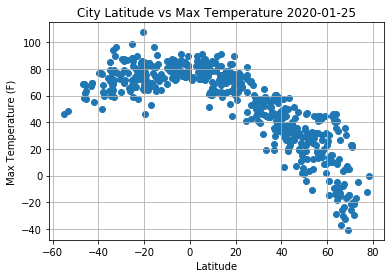

In [10]:
date_of_analysis = datetime.date(datetime.now())
# Create a scatter plot for latitude vs max temperature.
x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature {date_of_analysis}")
plt.grid()
plt.savefig("./Images/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

The above scatter plot shows how a city's maximum temperature is related to its latitude. Specifically, it shows how max temperature changes as you get closer (or farther) away from the equator (Latitude of 0). For example, the cities with the highest maximum temperatures are closest to the equator (that is, cities from about -40 to 20 degrees Latitude). As you go farther south into the southern hemisphere, the max temperature starts to decrease. And, as you go farther north in the northern hemisphere, the max temperature steadily decreases as well. So, from this graph, we can conclude that the hottest temperatures for a city are higher for a city that is closer to the equator and lower for a city farther north or south.

### Latitude vs Humidity (%) Plot

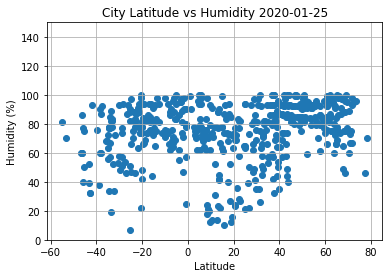

In [11]:
# Create a scatter plot for latitude vs humidity.
x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity {date_of_analysis}')
plt.ylim(0, 150)
plt.grid()
plt.savefig("./Images/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

The above scatter plot shows how a city's humidity is related to its latitude. Specifically, it shows how humidity changes as you get closer (or farther) away from the equator (Latitude of 0). Looking at this graph, the data points are scattered pretty evenly throughout, and it does not appear that there is a strong correlation between a city's latitude and humidity. Most cities (near the equator or farther away) that are shown in this graph have a humidity from about 60% to 100%. So, high humidity occurs in cities irregardless of latitude. However, there are a few cities that have low humidity, and according this graph, these cities are found only near the equaor. Besides a few outliers, there are not really any cities farther away from the equator that have low humidity.

### Latitude vs Cloudiness (%) Plot

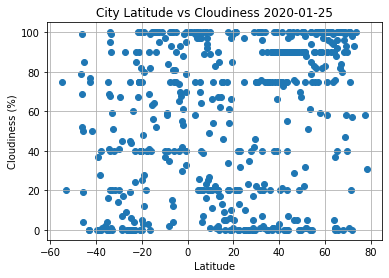

In [12]:
# Create a scatter plot for latitude vs cloudiness.
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness {date_of_analysis}')
plt.grid()
plt.savefig("./Images/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

The above scatter plot shows how a city's cloudiness is related to its latitude. Specifically, it shows how cloudiness changes as you get closer (or farther) away from the equator (latitude of 0). Looking at this graph, the data points are pretty spread out evenly on the graph. Most cities (near or far from the equator) either generally have a really low cloudiness level (near 0) or a really high cloudiness level (near 100). So, most of the data points are near the extremes. However, there are cities that have a cloudiness level somewhere in between. Because the data points are scattered, it does not appear that there is a strong correlation between a city's latitude and cloudiness. That is, from the OpenWeatherMap API, we were able to find cites near the equator that had a low cloudiness level, a high cloudiness level, or a cloudiness level somewhere in between. The same goes for cities farther away from the equator.

### Latitude vs Wind Speed (mph) Plot

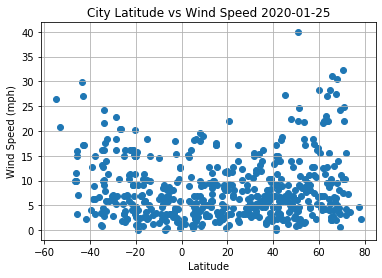

In [13]:
# Create a scatter plot for latitude vs wind speed.
x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed {date_of_analysis}')
plt.grid()
plt.savefig("./Images/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

The above scatter plot shows how a city's wind speed is related to its latitude. Specifically, it shows how wind speed changes as you get closer (or farther) away from the equator (latitude of 0). Looking at this graph, the data points are clustered around lower wind speed values. Both cities near the equator and farther away from the equator appear to have lower wind speeds. So, from the above graph, it does not appear that there is a strong correlation between a city's latitude and wind speed. Also, I think it is important to point out that there are some cities farther away from the equator in the southern hemisphere (-20 to -40 Latitude) and in the northern hemisphere (40 to 60 Latitude) that have higher wind speeds.

## Linear Regression

In [14]:
# Create a function to create linear regression plots.
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.savefig(f"./Images/{hemisphere}_{x_label}_vs_{y_label}.png", bbox_inches="tight")
    return plt.plot(x_values,regress_values,"r-")

    

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_weather_df = weather_df.loc[weather_df["Latitude"] >= 0]
southern_hemisphere_weather_df = weather_df.loc[weather_df["Latitude"] < 0]

###  Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression

The r-squared is: 0.7756017994684654
The correlation between both factors is -0.88


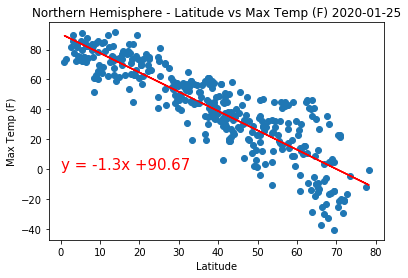

In [16]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Northern",(0, 0))

The linear regression modeling for maximum temperature vs latitude for the northern hemisphere shows that there is a strong, negative correlation between maximum temperature and latitude. That is, as you go father north away from the equator (latitude is increasing), the maximum temperature steadily decreases. And, vice versa, the closer you get to the equator away from higher latitudes (latitude is decreasing), the maximum temperature steadily increases.

### Southern Hemisphere - Max Temp (F) vs. Latitude Linear Regression

The r-squared is: 0.19204784838103844
The correlation between both factors is 0.44


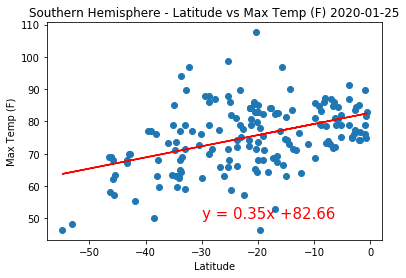

In [17]:
# Create a scatter plot for latitude vs max temp (southern hemisphere)
x_values = southern_hemisphere_weather_df['Latitude']
y_values = southern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Southern",(-30, 50))

The linear regression modeling for maximum temperature vs latitude for the southern hemisphere shows that there is a weak, positive correlation between maximum temperature and latitude. That is, as you go closer and closer to the equator (latitude is increasing), the max temperature increases but by not very much (as indicated by the small slope of the linear regression line). And, vice versa, as you go farther away from the equator (latitude is decreasing), the maximum temperature also decreases but by not very much (as indicated by the small slope of the linear regression line).

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10819658619316115
The correlation between both factors is 0.33


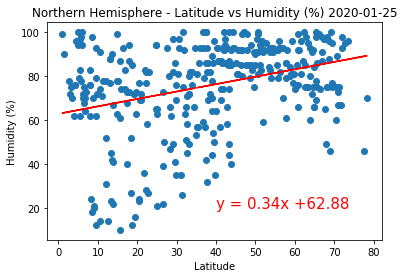

In [18]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))

The linear regression modeling for humidity vs latitude for the northern hemisphere shows that there is a weak, positive correlation between humidity and latitude. That is, as latitude increases (you are moving farther and farther away from the equator), the humidity level increases just slightly. We can tell that the humidity level doesn't increase by much by the small slope of the linear regression line. In addition, the opposite is also true. As we move closer to the equator (latitude is decreasing), the humidity level decreases but not by very much.

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10819658619316115
The correlation between both factors is 0.33


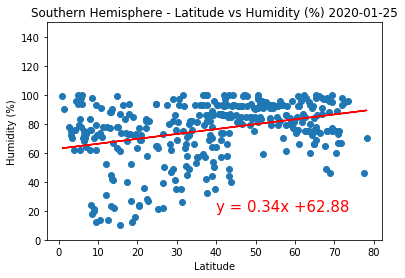

In [19]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values1 = southern_hemisphere_weather_df['Latitude']
y_values1 = southern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)

The linear regression modeling for humidity vs latitude for the southern hemisphere shows that there is a weak, positive correlation between humidity and latitude. That is, as latitude increases (you are moving closer to the equator), the humidity level increases but only slightly. We can tell that the humidity level doesn't increase by much by the small slope of the linear regression line. In addition, the opposite is also true. As we move farther away from the equator (latitude is decreasing), the humidity level decreases but not by very much. Overall, latitude does not have much of an influence on humidity in the southern hemisphere.

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06103648485136353
The correlation between both factors is 0.25


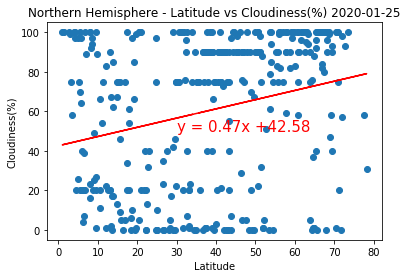

In [20]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

The linear regression modeling for cloudiness vs latitude for the northern hemisphere shows that there is a very weak (or possibly none), positive correlation between latitude and cloudiness. That is, as you move farther away from the equator (latitude increases) or as you move closer to the equator (latitude decreases), latitude does not seem to affect or have an influence on how cloudy it is. This is shown in the graph as the data points being scattered all over the place.

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10335651715885959
The correlation between both factors is 0.32


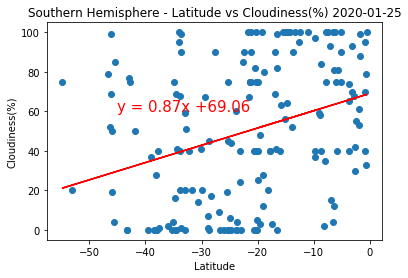

In [21]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Latitude']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

The linear regression modeling for cloudiness vs latitude for the southern hemisphere shows that there is a weak, positive correlation between latitude and cloudiness. That is, as you move farther away from the equator (latitude decreases) or as you move closer to the equator (latitude increases), latitude does not seem to have much of an effect or have an influence on how cloudy it is. This is shown in the graph as the data points being scattered all over the place. Also, it is important to note that although there is a weak correlation for the southern hemisphere, the correlation between cloudiness and latitude is a bit more stronger for the southern hemisphere than for the same factors for the northern hemisphere.

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04626242906946019
The correlation between both factors is 0.22


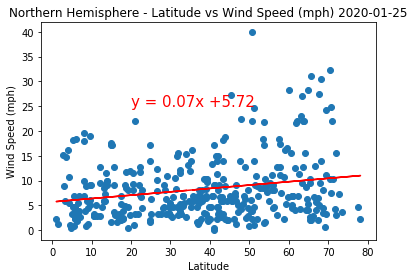

In [22]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))

The linear regression modeling for wind speed vs latitude for the northern hemisphere shows that there is a very weak (to almost none), positive correlation for wind speed and latitude. That is, as you go farther north away from the equator (latitude is increasing) or as you go towards the equator (latitude is decreasing), it appears as if latitude does not have much of any effect on the wind speed for cities. In fact, from the above graph, it appears that cities near and farther away from the equator in the norther hemisphere generally both have lower wind speeds despite a few outliers. This is shown in the graph as many of the data points being scattered towards the bottom half of the graph.

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1445578121753978
The correlation between both factors is -0.38


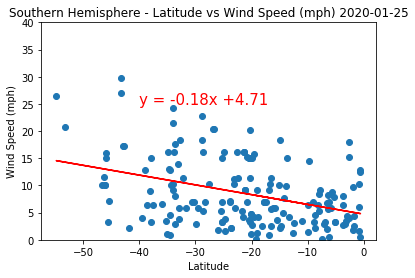

In [23]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemisphere_weather_df['Latitude']
y_values = southern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)

The linear regression modeling for wind speed vs latitude for the southern hemisphere shows that there is a weak, negative correlation for wind speed and latitude. That is, as you go farther south away from the equator (latitude is decreasing), wind speed slightly increases and as you go towards the equator (latitude is increasing), wind speed slightly decreases. This is indicated in the graph by the small, negative slope of the linear regression line. Overall, the correlation between these two factors is weak. Latitude has a small influence on wind speed but not much. However, it is important to note that the correlation between these two factors for the southern hemisphere is stronger than the correlation between these two factors for the northern hemisphere.